Importing Libraries

In [761]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading Dataset

In [732]:
bnb=pd.read_csv('AB_NYC_2019.csv')
bnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Shape of the dataset

In [733]:
np.shape(bnb)

(48895, 16)

Summary of Dataframe

In [734]:
bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# Preparing and Cleaning the Data

Removing the duplicates if any

In [735]:
bnb.duplicated().sum()

0

Dropping unnecessary columns

In [736]:
#dropping the insignificant columns
del bnb["calculated_host_listings_count"], bnb["id"], bnb["host_name"],bnb['name']

Checking the null values 

In [737]:
bnb.isnull().sum()

host_id                    0
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
number_of_reviews          0
last_review            10052
reviews_per_month      10052
availability_365           0
dtype: int64

replacing 'last_review' and 'reviews_per_month' by zero

In [738]:
bnb.fillna({'last_review':0,'reviews_per_month':0}, inplace=True)

In [739]:
bnb.isnull().sum()

host_id                0
neighbourhood_group    0
neighbourhood          0
latitude               0
longitude              0
room_type              0
price                  0
minimum_nights         0
number_of_reviews      0
last_review            0
reviews_per_month      0
availability_365       0
dtype: int64

Column labels of the Dataframe

In [740]:
bnb.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'availability_365'],
      dtype='object')

Unique values from neighbourhood_group column

In [741]:
bnb['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

Count number of distinct elements in neighbourhood

In [742]:
bnb['neighbourhood'].nunique()

221

Unique values from room_type column

In [743]:
bnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

# Exploring and Visualizing Data

Pairwise correlation of columns

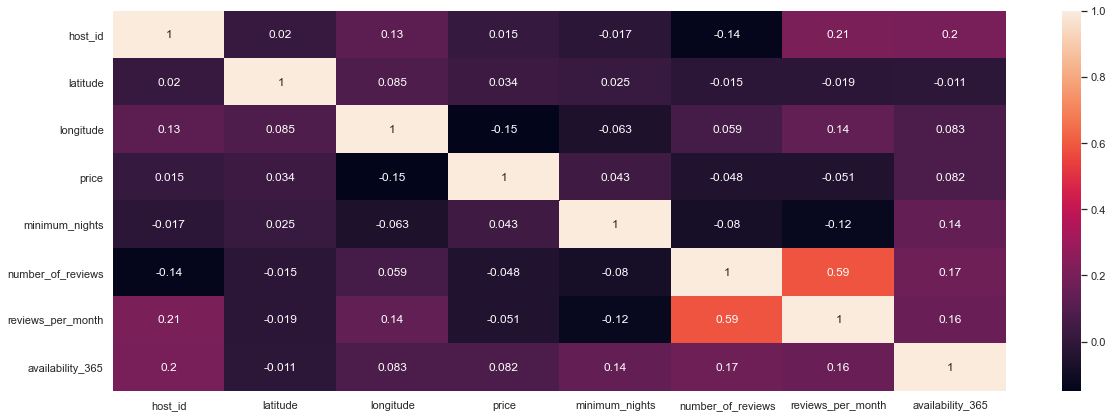

In [744]:
plt.figure(figsize=(20,7))
corr_ = bnb.corr()
sns.heatmap(corr_,annot=True);

Plot of neighbourhood group

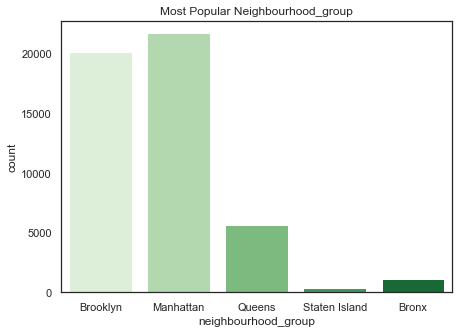

In [745]:
plt.figure(figsize=(7, 5))
sns.countplot(x='neighbourhood_group',data=bnb,palette='Greens')
plt.title("Most Popular Neighbourhood_group")
sns.set_style("white");

plot of neighbourhood group based on room type

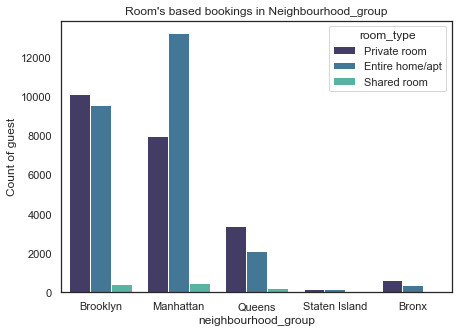

In [746]:
plt.figure(figsize=(7, 5))
sns.countplot(x='neighbourhood_group',hue='room_type',data=bnb,palette='mako')
plt.title("Room's based bookings in Neighbourhood_group")
plt.ylabel("Count of guest");

Review's count in neighbourhood_group

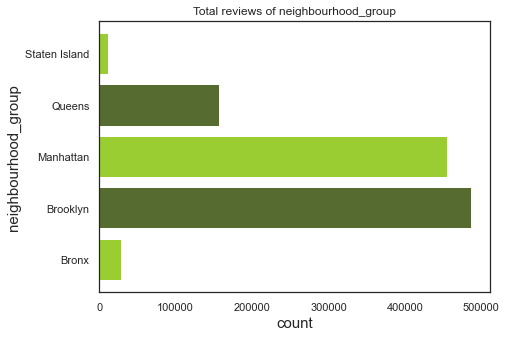

In [747]:
a=plt.figure(figsize=(7,5))
x=bnb['neighbourhood_group'].sort_values().unique()
y=bnb.groupby(['neighbourhood_group'])['number_of_reviews'].sum()
plt.barh(x,y,color=['yellowgreen','darkolivegreen'])
plt.ylabel('neighbourhood_group',size=15)
plt.xlabel('count',size=15)
plt.title("Total reviews of neighbourhood_group")
sns.set_style("white");

Mean price of rooms in neighbourhood_group

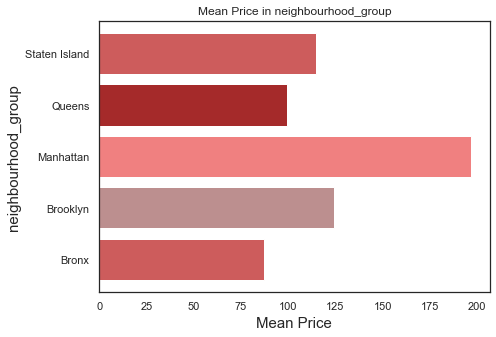

In [748]:
a=plt.figure(figsize=(7,5))
x=bnb['neighbourhood_group'].sort_values().unique()
y=bnb.groupby(['neighbourhood_group'])['price'].mean()
plt.barh(x,y,color=['indianred','rosybrown','lightcoral','brown'])
plt.xlabel('Mean Price',size=15)
plt.ylabel('neighbourhood_group',size=15)
plt.title("Mean Price in neighbourhood_group")
sns.set_style('white');

Variation of prices in neighbourhood_group

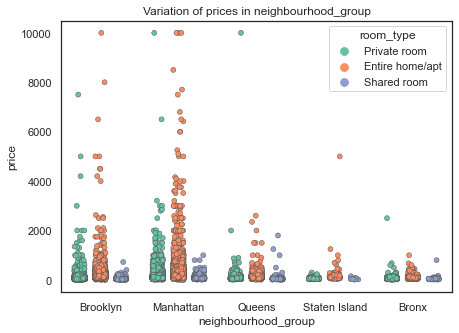

In [749]:
plt.figure(figsize=(7,5))
sns.stripplot(x="neighbourhood_group",y="price",hue="room_type",data=bnb,linewidth=0.5,
              jitter=0.2, palette="Set2",dodge=True)
plt.title('Variation of prices in neighbourhood_group');

Top 10 busy neighbourhood

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


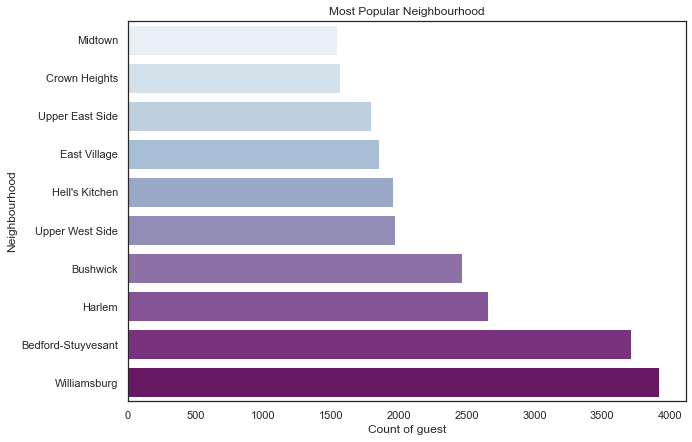

In [751]:
data = bnb['neighbourhood'].value_counts()[:10]
plt.figure(figsize=(10,7))
y = list(data.index)
x = list(data.values)
x.reverse()
y.reverse()

plt.title("Most Popular Neighbourhood")
plt.ylabel("Neighbourhood")
plt.xlabel("Count of guest")

sns.barplot(x, y,data=bnb,palette='BuPu');

Converting a continuous variable into a column of categorical variables to determine the desired stay

In [752]:
bnb['minimum_night_cat']=pd.cut(bnb['minimum_nights'],bins=[0,6,7,29,30,180,365,1251],labels=['few days','week','less than 1 month','1 month','more than 1 month','more than half year','more than a year'])

In [753]:
bnb.minimum_night_cat.head(6)

0             few days
1             few days
2             few days
3             few days
4    less than 1 month
5             few days
Name: minimum_night_cat, dtype: category
Categories (7, object): ['few days' < 'week' < 'less than 1 month' < '1 month' < 'more than 1 month' < 'more than half year' < 'more than a year']

Plot of preferred stays in neighbourhood_group

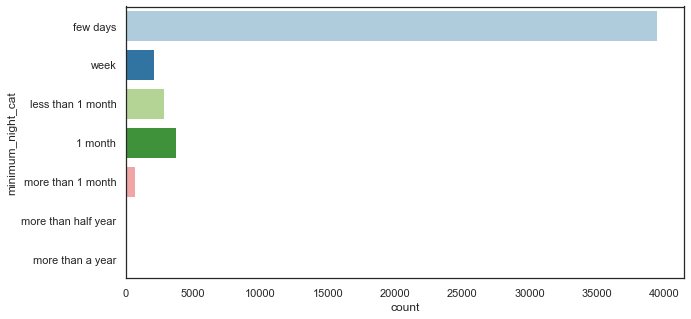

In [754]:
plt.figure(figsize=(10,5))
sns.countplot(y=bnb['minimum_night_cat'],data=bnb, palette='Paired');

Taking out month from last_month

In [755]:
bnb['last_review']=pd.to_datetime(bnb['last_review'],format='%Y-%m-%d')
bnb['last_month']=bnb['last_review'].apply(lambda x: x.month)

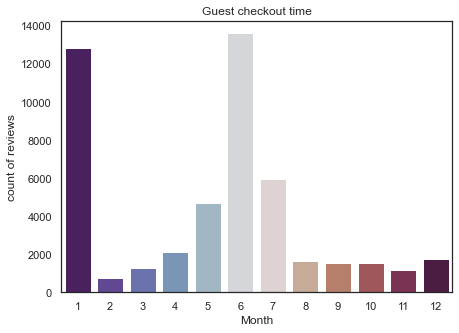

In [756]:
plt.figure(figsize=(7,5))
checkout_date=bnb.groupby('last_month')['last_month'].count()
sns.countplot(x=bnb['last_month'],palette='twilight_shifted')
plt.title("Guest checkout time")
plt.xlabel('Month')
plt.ylabel('count of reviews');

# Map of Neighbourhood group¶

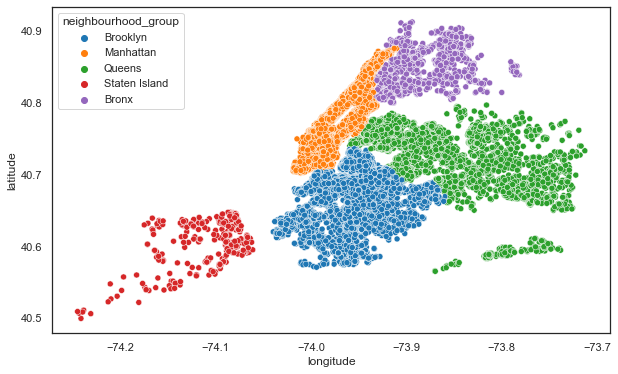

In [757]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=bnb.longitude,y=bnb.latitude,hue=bnb.neighbourhood_group);

# Map of Neighbourhood¶

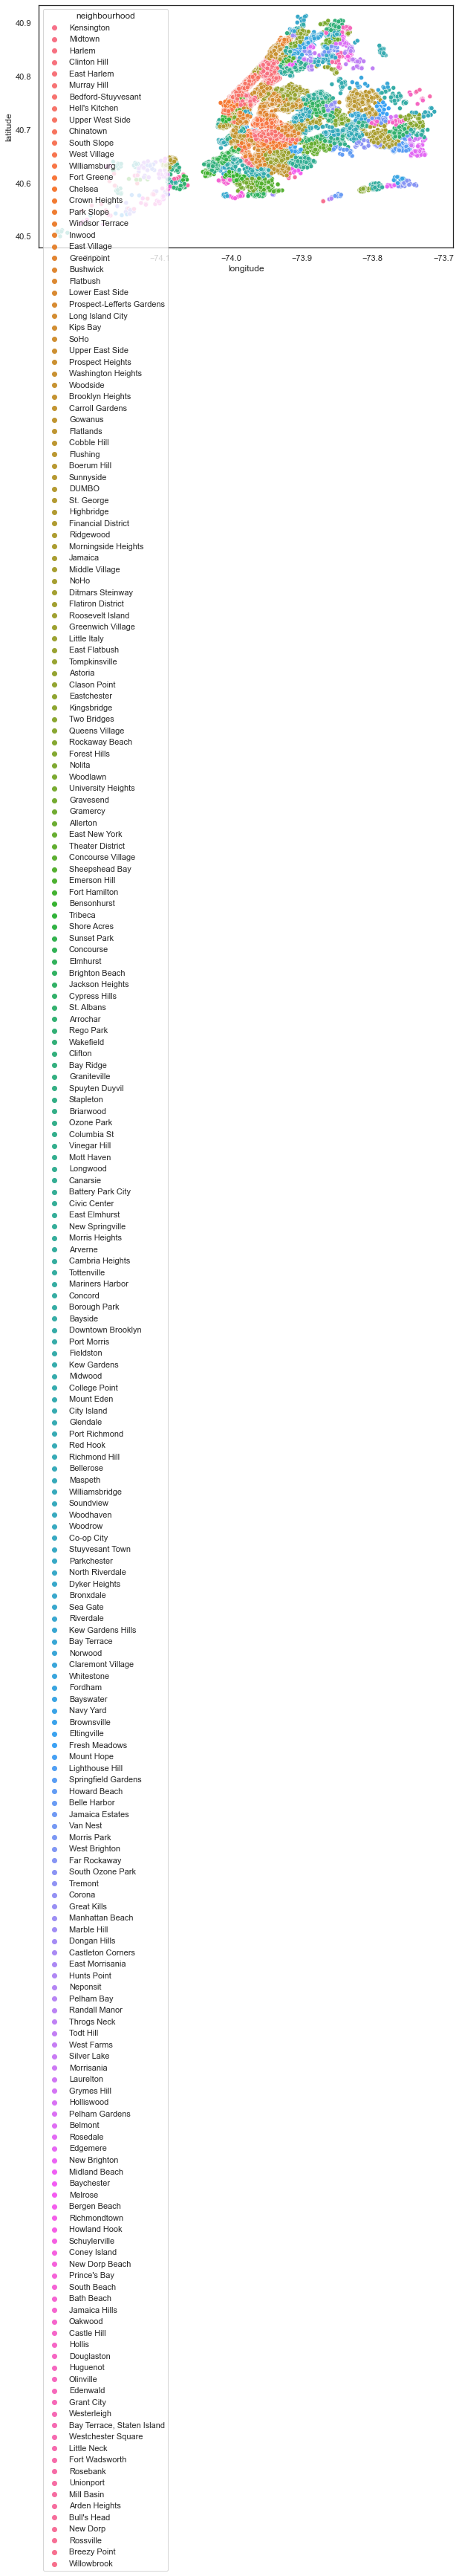

In [758]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=bnb.longitude,y=bnb.latitude,hue=bnb.neighbourhood);